<center>
    <img src="https://storage.googleapis.com/pr-newsroom-wp/1/2018/11/Spotify_Logo_CMYK_Green.png" width=600>
    <div style="display:fill;
                margin:10px;
                padding:20px;
                color:white;
                border-width: 2px;
                border-radius:20px;
                border-style:solid;
                border-color:#150D0A;
                background-color:#1AB26B;
                font-size:220%;
                font-weight:700;
                text-align:center;">Predictor Contenido Explicito</div>
</center>

# <b>1 <span style='color:#1AB26B'>|</span> Importar las librerías</b>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_palette(sns.color_palette(['#011f4b','#03396c','#005b96','#6497b1','#b3cde0']))
plt.style.use('fivethirtyeight')

# <b>2 <span style='color:#1AB26B'>|</span> Cargar un conjunto de datos tabulares</b>
- Integración con el API de Spotify para el cargue de los datos

In [2]:
%pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from datetime import datetime

# Especificar las credenciales de la API de Spotify
client_id = 'eb0e84e3beef4eb1ac9498c6807c7c42'
client_secret = '048badec708d47b9b5033b018e973168'

# Inicializar el objeto Spotify
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Definir los parámetros de búsqueda
query = 'year:2012-' + str(datetime.now().year) # búsqueda de canciones desde 2012 hasta el año actual
limit = 50 # límite de resultados a obtener por llamada
total_tracks = 900 # número total de canciones a buscar
tracks_data = [] # lista para almacenar los datos de las canciones
offset = 0 # desplazamiento de resultados

# Realizar las llamadas necesarias para obtener el número de canciones requerido
while len(tracks_data) < total_tracks:
    results = sp.search(q=query, type='track', limit=limit, offset=offset)
    for track in results['tracks']['items']:
        # Obtener información adicional de la canción
        audio_features = sp.audio_features([track['id']])[0]
        # Comprobar si toda la información está disponible
        if audio_features is not None and all(key in track for key in ['name', 'artists', 'album', 'id', 'external_urls']):
            track_data = {
                'Nombre': track['name'],
                'Artistas': ', '.join([artist['name'] for artist in track['artists']]),
                'Album': track['album']['name'],
                'Año': track['album']['release_date'][0:4],
                'Duración_ms': track['duration_ms'],
                'Explícito': track['explicit'],
                'Popularidad': track['popularity'],
                'Número_de_pista': track['track_number'],
                'Tempo': audio_features['tempo'],
                'Modo': audio_features['mode'],
                'Energía': audio_features['energy'],
                'valence' : audio_features['valence'],
                'liveness' : audio_features['liveness'],
                'instrumentalness' : audio_features['instrumentalness'],
                'acousticness' : audio_features['acousticness'],
                'speechiness' : audio_features['speechiness'],
                'loudness' : audio_features['loudness']
            }
            # Validar si la canción ya ha sido agregada a la lista de canciones
            if track_data not in tracks_data:
                # Agregar la canción a la lista
                tracks_data.append(track_data)
        # Salir del bucle si se han obtenido todas las canciones requeridas
        if len(tracks_data) == total_tracks:
            break
    # Actualizar el desplazamiento para la siguiente llamada
    offset += limit

# Crear un dataframe de pandas a partir de los datos de las canciones
df = pd.DataFrame(tracks_data)

<div style="display:fill;
            color:white;
            border-radius:8px;
            border-width: 1px;
            border-style:solid;
            border-color:#150D0A;
            background-color:#1AB26B;
            font-size:120%;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Acerca del dataset</b></p>
</div>

**Información de los Atributos:**
1. **Año:** En el caso de este atributo, los outliers pueden indicar la presencia de canciones antiguas o muy nuevas que tienen una popularidad inesperada o que pueden ser importantes culturalmente.
2. **Duración_ms:** Los outliers pueden indicar la presencia de canciones que son significativamente más largas o cortas que la mayoría de las canciones en la base de datos. Estos outliers podrían estar relacionados con la popularidad de la canción, ya que las canciones más populares tienden a tener una duración similar.
3. **Popularidad:** Los outliers pueden indicar la presencia de canciones extremadamente populares o impopulares que pueden ser importantes culturalmente o simplemente una anomalía en la base de datos.
4. **Número de pista:** Este atributo no puede tener outliers.
5. **Tempo:** Los outliers pueden indicar la presencia de canciones con un tempo extremadamente rápido o lento, lo que podría estar relacionado con el género musical o la popularidad de la canción.
6. **Energía:** Los outliers pueden indicar la presencia de canciones con una energía extremadamente alta o baja, lo que podría estar relacionado con el género musical o la popularidad de la canción.
7. **Valence:** Los outliers pueden indicar la presencia de canciones extremadamente positivas o negativas, lo que podría estar relacionado con el género musical o la popularidad de la canción.
8. **Liveness:** Los outliers pueden indicar la presencia de canciones que se grabaron en vivo, lo que podría estar relacionado con la popularidad de la canción o la naturaleza del artista.
9. **Instrumentalness:** Los outliers pueden indicar la presencia de canciones que son extremadamente instrumentales o vocales, lo que podría estar relacionado con el género musical o la popularidad de la canción.
10. **Acousticness:** Los outliers pueden indicar la presencia de canciones que son extremadamente acústicas o no acústicas, lo que podría estar relacionado con el género musical o la popularidad de la canción.
11. **Speechiness:** Los outliers pueden indicar la presencia de canciones que contienen una cantidad inesperada de elementos hablados, lo que podría estar relacionado con el género musical o la popularidad de la canción.
12. **Loudness:** Los outliers pueden indicar la presencia de canciones extremadamente fuertes o suaves, lo que podría estar relacionado con el género musical o la popularidad de la canción.

# <b>3 <span style='color:#1AB26B'>|</span> Entendiendo nuestros datos</b>

<div style="display:fill;
            color:white;
            border-radius:8px;
            border-width: 1px;
            border-style:solid;
            border-color:#150D0A;
            background-color:#1AB26B;
            font-size:120%;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Información general</b></p>
</div>

In [4]:
# ¿Cual es la forma del dataset?
df.shape

(900, 17)

In [5]:
# Alguna información sobre nuestros atributos y su tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nombre            900 non-null    object 
 1   Artistas          900 non-null    object 
 2   Album             900 non-null    object 
 3   Año               900 non-null    object 
 4   Duración_ms       900 non-null    int64  
 5   Explícito         900 non-null    bool   
 6   Popularidad       900 non-null    int64  
 7   Número_de_pista   900 non-null    int64  
 8   Tempo             900 non-null    float64
 9   Modo              900 non-null    int64  
 10  Energía           900 non-null    float64
 11  valence           900 non-null    float64
 12  liveness          900 non-null    float64
 13  instrumentalness  900 non-null    float64
 14  acousticness      900 non-null    float64
 15  speechiness       900 non-null    float64
 16  loudness          900 non-null    float64
dt

In [6]:
# Obtener mas información de los tipos de dato object
_ = [print(f"{atr}: {type(df[atr].values[0])}") for atr in df if df[atr].dtype == 'object']

Nombre: <class 'str'>
Artistas: <class 'str'>
Album: <class 'str'>
Año: <class 'str'>


<div style="display:fill;
            color:white;
            border-radius:8px;
            border-width: 1px;
            border-style:solid;
            border-color:#150D0A;
            background-color:#1AB26B;
            font-size:120%;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Conversión de tipos de datos</b></p>
</div>

In [7]:
# Convertimos el atributo Año de object a int64
df = df.astype({'Año':'int64'})
print('{}: {}'.format('Año', df['Año'].dtype))

Año: int64


<div style="display:fill;
            color:white;
            border-radius:8px;
            border-width: 1px;
            border-style:solid;
            border-color:#150D0A;
            background-color:#1AB26B;
            font-size:120%;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Codificando columnas categoricas</b></p>
</div>

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Explícito']=encoder.fit_transform(df['Explícito'])

<div style="display:fill;
            color:white;
            border-radius:8px;
            border-width: 1px;
            border-style:solid;
            border-color:#150D0A;
            background-color:#1AB26B;
            font-size:120%;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Vista preliminar</b></p>
</div>

In [9]:
df.head()

Nombre  \
0                      Boy's a liar Pt. 2   
1                               Kill Bill   
2                                 Flowers   
3                              Last Night   
4  Creepin' (with The Weeknd & 21 Savage)   

                              Artistas                      Album   Año  \
0            PinkPantheress, Ice Spice         Boy's a liar Pt. 2  2023   
1                                  SZA                        SOS  2022   
2                          Miley Cyrus                    Flowers  2023   
3                        Morgan Wallen  3 Songs At A Time Sampler  2023   
4  Metro Boomin, The Weeknd, 21 Savage          HEROES & VILLAINS  2022   

   Duración_ms  Explícito  Popularidad  Número_de_pista    Tempo  Modo  \
0       131013          0           97                1  132.962     1   
1       153946          0           95                2   88.980     1   
2       200454          0          100                1  117.999     1   
3       163854          1           89                1  203.853     1   
4       221520          1           96               10   97.950     0   

   Energía  valence  liveness  instrumentalness  acousticness  speechiness  \
0    0.809    0.857    0.2480          0.000128        0.2520       0.0500   
1    0.735    0.418    0.1610          0.144000        0.0521       0.0391   
2    0.681    0.646    0.0322          0.000005        0.0632       0.0668   
3    0.675    0.518    0.1510          0.000000        0.4590       0.0357   
4    0.620    0.172    0.0822          0.000000        0.4170       0.0484   

   loudness  
0    -8.254  
1    -5.747  
2    -4.325  
3    -5.382  
4    -6.005

In [10]:
df.tail()

Nombre  \
895                                Leave The Door Open   
896                           HOTEL LOBBY (Unc & Phew)   
897  JUGGERNAUT (feat. Lil Uzi Vert & Pharrell Will...   
898                                        After Party   
899                                                Woo   

                                              Artistas  \
895             Bruno Mars, Anderson .Paak, Silk Sonic   
896                                     Quavo, Takeoff   
897  Tyler, The Creator, Lil Uzi Vert, Pharrell Wil...   
898                                        Don Toliver   
899                                            Rihanna   

                                        Album   Año  Duración_ms  Explícito  \
895                An Evening With Silk Sonic  2021       242096          0   
896                  HOTEL LOBBY (Unc & Phew)  2022       142657          1   
897  CALL ME IF YOU GET LOST: The Estate Sale  2023       146419          1   
898                            Heaven Or Hell  2020       167915          1   
899                             ANTI (Deluxe)  2016       235586          1   

     Popularidad  Número_de_pista    Tempo  Modo  Energía  valence  liveness  \
895           83                2  148.088     1    0.616    0.719    0.0927   
896           78                1  127.961     1    0.636    0.163    0.2330   
897           66               14  142.034     1    0.571    0.620    0.1660   
898           78                4  162.948     1    0.692    0.453    0.6030   
899           79                6  115.004     1    0.466    0.185    0.2980   

     instrumentalness  acousticness  speechiness  loudness  
895           0.00000       0.18200       0.0324    -7.964  
896           0.00000       0.14200       0.1690    -4.479  
897           0.00000       0.01950       0.3660    -7.949  
898           0.33100       0.00981       0.0376    -8.045  
899           0.00389       0.05460       0.0326    -5.298

In [11]:
# Algun analisis de las columnas numericas
df.describe()

Año    Duración_ms   Explícito  Popularidad  Número_de_pista  \
count   900.000000     900.000000  900.000000   900.000000       900.000000   
mean   2020.046667  205218.292222    0.478889    74.645556         7.630000   
std       3.132243   51401.331661    0.499832    23.312691        10.465781   
min    2012.000000   57370.000000    0.000000     0.000000         1.000000   
25%    2018.000000  174513.750000    0.000000    77.000000         1.000000   
50%    2022.000000  203706.500000    0.000000    81.000000         4.000000   
75%    2023.000000  230706.250000    1.000000    84.000000        10.000000   
max    2023.000000  613026.000000    1.000000   100.000000        96.000000   

            Tempo        Modo     Energía     valence    liveness  \
count  900.000000  900.000000  900.000000  900.000000  900.000000   
mean   121.590340    0.614444    0.613656    0.449797    0.179423   
std     30.332998    0.486997    0.171031    0.220094    0.132661   
min      0.000000    0.000000    0.003420    0.000000    0.032200   
25%     97.011750    0.000000    0.511750    0.276000    0.098975   
50%    120.536500    1.000000    0.624500    0.441000    0.122500   
75%    142.013500    1.000000    0.742000    0.607000    0.215000   
max    210.164000    1.000000    0.976000    0.965000    0.844000   

       instrumentalness  acousticness  speechiness    loudness  
count        900.000000    900.000000   900.000000  900.000000  
mean           0.031341      0.259374     0.101958   -6.930710  
std            0.137054      0.256696     0.106484    2.882735  
min            0.000000      0.000008     0.000000  -30.397000  
25%            0.000000      0.054125     0.035700   -8.192250  
50%            0.000004      0.156500     0.054950   -6.384500  
75%            0.000264      0.417250     0.118000   -5.219000  
max            1.000000      0.985000     0.737000   -0.514000

**Aca podemos observar lo siguiente:**
1. **Año:** El año promedio de las pistas es del 2020.
2. **Duración_ms:** La duración media de las pistas es de aproximadamente 205.218 milisegundos, lo que equivale a alrededor de 3,42 minutos.
3. **Explicito:** El 47,89% de las pistas son explícitas, lo que significa que contienen lenguaje o contenido que puede ofender a algunos oyentes.
4. **Popularidad:** La popularidad media de las pistas es de 74,65, lo que indica que son relativamente populares entre los oyentes.
5. **Número de pista:** El número medio de pista es de 7,63, lo que sugiere que estas pistas son parte de un álbum o una lista de reproducción.
6. **Tempo:** El tempo medio de las pistas es de 121,59, lo que indica que tienen un ritmo moderadamente rápido.
7. **Modo:** El modo medio es de 0,61, lo que sugiere que la mayoría de las pistas están en modo mayor.
8. **Energía:** La energía media de las pistas es de 0,61, lo que indica que son relativamente enérgicas.
9. **Valence:** La valencia media es de 0,44, lo que indica que las pistas tienen una tendencia hacia emociones más negativas.
10. **Liveness:** La liveness media es de 0,18, lo que sugiere que la mayoría de las pistas fueron grabadas en un estudio en lugar de en vivo.
11. **Instrumentalness:** La instrumentalness media es de 0,03, lo que indica que la mayoría de las pistas contienen voces.
12. **Acousticness:** El acousticness medio es de 0,26, lo que indica que la mayoría de las pistas tienen una mezcla de sonidos acústicos y electrónicos.
13. **Speechiness:** La speechiness media es de 0,10, lo que sugiere que la mayoría de las pistas tienen una cantidad moderada de diálogo o habla.
14. **Loudness:** El loudness medio es de -6,93, lo que indica que las pistas tienen un volumen moderado.
**Confirmaremos estas observaciónes en la sección EDA**

<div style="display:fill;
            color:white;
            border-radius:8px;
            border-width: 1px;
            border-style:solid;
            border-color:#150D0A;
            background-color:#1AB26B;
            font-size:120%;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Limpieza de datos</b></p>
</div>

In [12]:
df.duplicated().sum()

0

**No tenemos valores duplicados en el dataset!**

In [13]:
df.isnull().sum()

Nombre              0
Artistas            0
Album               0
Año                 0
Duración_ms         0
Explícito           0
Popularidad         0
Número_de_pista     0
Tempo               0
Modo                0
Energía             0
valence             0
liveness            0
instrumentalness    0
acousticness        0
speechiness         0
loudness            0
dtype: int64

**No tenemos valores nulos en el dataset!**

In [14]:
df.isna().sum()

Nombre              0
Artistas            0
Album               0
Año                 0
Duración_ms         0
Explícito           0
Popularidad         0
Número_de_pista     0
Tempo               0
Modo                0
Energía             0
valence             0
liveness            0
instrumentalness    0
acousticness        0
speechiness         0
loudness            0
dtype: int64

**No tenemos valores na en el dataset!**

<div style="display:fill;
            color:white;
            border-radius:8px;
            border-width: 1px;
            border-style:solid;
            border-color:#150D0A;
            background-color:#1AB26B;
            font-size:120%;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Análisis de valores extraños</b></p>
</div>

In [25]:
n_rows = df.shape[0]

for i, col in enumerate(df.columns[:-1]):
    zeros_count = (df[col] == 0).sum()
    zeros_percentage = 100 * zeros_count / n_rows
    
    print(f"Atributo: {col}\nNúmero de valores cero: {zeros_count}\nPorcentaje de valores cero: {zeros_percentage:.2f}\n")

Atributo: Nombre
Número de valores cero: 0
Porcentaje de valores cero: 0.00

Atributo: Artistas
Número de valores cero: 0
Porcentaje de valores cero: 0.00

Atributo: Album
Número de valores cero: 0
Porcentaje de valores cero: 0.00

Atributo: Año
Número de valores cero: 0
Porcentaje de valores cero: 0.00

Atributo: Duración_ms
Número de valores cero: 0
Porcentaje de valores cero: 0.00

Atributo: Explícito
Número de valores cero: 469
Porcentaje de valores cero: 52.11

Atributo: Popularidad
Número de valores cero: 70
Porcentaje de valores cero: 7.78

Atributo: Número_de_pista
Número de valores cero: 0
Porcentaje de valores cero: 0.00

Atributo: Tempo
Número de valores cero: 2
Porcentaje de valores cero: 0.22

Atributo: Modo
Número de valores cero: 347
Porcentaje de valores cero: 38.56

Atributo: Energía
Número de valores cero: 0
Porcentaje de valores cero: 0.00

Atributo: valence
Número de valores cero: 2
Porcentaje de valores cero: 0.22

Atributo: liveness
Número de valores cero: 0
Porce

**En los valores extraños se evidencia lo siguiente:**

- **"Explícito"** tiene un alto porcentaje de valores cero (52.11%). Este atributo indica si una pista de música contiene lenguaje explícito o contenido gráfico. La alta proporción de valores cero sugiere que la mayoría de las pistas de la muestra no son explícitas.
- **"Popularidad"** tiene 70 valores cero (7.78%). Este atributo indica la popularidad de una pista de música. Los valores cero sugieren que estas pistas no son muy populares en comparación con otras en la muestra.
- **"Tempo"** indica el ritmo de la canción en términos de su velocidad o tempo en beats por minuto (BPM). En este conjunto de datos, hay solo 2 canciones con un valor cero en este atributo, lo que representa solo el 0.22% de todas las canciones. Esto puede deberse a un error de grabación o puede ser que estas canciones sean instrumentalmente simples y carezcan de un tempo discernible.
- **"Modo"** tiene una cantidad significativa de valores cero (347, 38.56%). Este atributo indica si una pista de música está en modo mayor o menor. La alta proporción de valores cero sugiere que la mayoría de las pistas de la muestra están en modo mayor.
- **"valence"** se refiere al positivismo o negativismo de la canción. Un valor cercano a 1 significa que la canción tiene una energía positiva y alegre, mientras que un valor cercano a 0 significa que la canción tiene una energía negativa y triste. Hay 2 canciones con un valor cero en este atributo, lo que representa solo el 0.22% de todas las canciones. Es posible que estas canciones sean de naturaleza más sombría y carezcan de un elemento de positividad en su contenido musical.
- **"instrumentalness"** tiene una cantidad significativa de valores cero (395, 43.89%). Este atributo indica si una pista de música contiene voces. La alta proporción de valores cero sugiere que la mayoría de las pistas de la muestra no son instrumentales.
- **"speechiness"** se refiere a la cantidad de elementos hablados en la canción en lugar de cantados. Un valor cercano a 1 indica que la canción es predominantemente hablada, mientras que un valor cercano a 0 indica que la canción es predominantemente cantada. Solo 2 canciones tienen un valor cero en este atributo, lo que representa el 0.22% de todas las canciones. Esto podría indicar que estas canciones son predominantemente instrumentales y carecen de elementos hablados o de palabras cantadas.

<div style="display:fill;
            color:white;
            border-radius:8px;
            border-width: 1px;
            border-style:solid;
            border-color:#150D0A;
            background-color:#1AB26B;
            font-size:120%;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Diagramas de pastel</b></p>
</div>

In [62]:
def get_artistas(explicito):
    # Obtener la lista de artistas únicos
    artists = set()
    for artist in df.loc[df['Explícito'] == explicito, 'Artistas']:
        artists.update(artist.split(', '))
    return artists

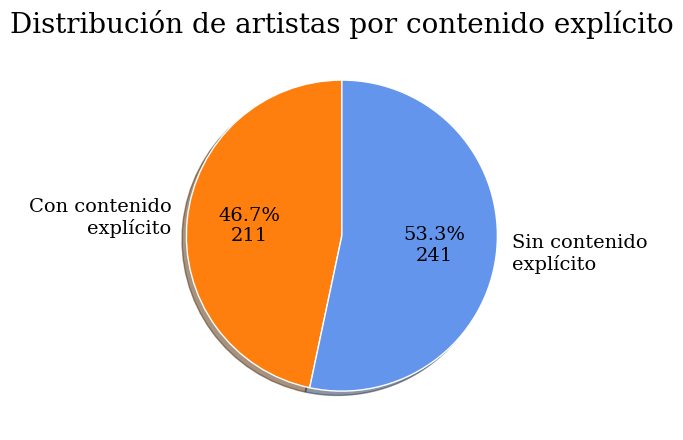

In [75]:
# Get the number of unique artists with and without explicit content
explicito_count = len(get_artistas(True))
no_explicito_count = len(get_artistas(False))

# Define the colors and labels for the pie chart
colors = ['#ff7f0e', 'cornflowerblue']
labels = ['Con contenido\nexplícito', 'Sin contenido\nexplícito']

# Define the parameters for the pie chart
plt.rcParams.update({'font.family': 'serif', 'font.size': 16, 'axes.edgecolor': 'black', 'axes.linewidth': 1.5, 'text.color': 'black'})

# Create the pie chart with percentages and count values
counts = [explicito_count, no_explicito_count]
plt.pie(counts, labels=labels, colors=colors, autopct=lambda p: '{:.1f}%\n{:.0f}'.format(p, p * sum(counts) / 100), startangle=90, textprops={'fontsize': 14}, wedgeprops={'edgecolor': 'white'}, shadow=True)

# Add a title and border to the pie chart
plt.title('Distribución de artistas por contenido explícito', fontsize=20)
plt.gca().set_aspect('equal')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(False)

# Show the pie chart
plt.show()

**Un análisis de artistas con contenido explícito del 46% y no explícito del 54% puede proporcionar información interesante sobre los patrones y preferencias de los usuarios de la plataforma de streaming de música Spotify.**

En primer lugar, el hecho de que casi la mitad de los artistas tengan contenido explícito sugiere que existe una demanda significativa por parte de los usuarios de Spotify por este tipo de música. Esto puede reflejar una tendencia más amplia en la cultura popular, donde el contenido explícito se ha vuelto cada vez más aceptable y común en la música, películas y otros medios.

Por otro lado, el hecho de que el 54% de los artistas no tengan contenido explícito sugiere que todavía hay una demanda significativa por parte de los usuarios de Spotify por música que no contiene lenguaje o temas explícitos. Esto puede ser especialmente importante para aquellos usuarios que prefieren escuchar música en entornos públicos o en presencia de niños u otros miembros de la familia.

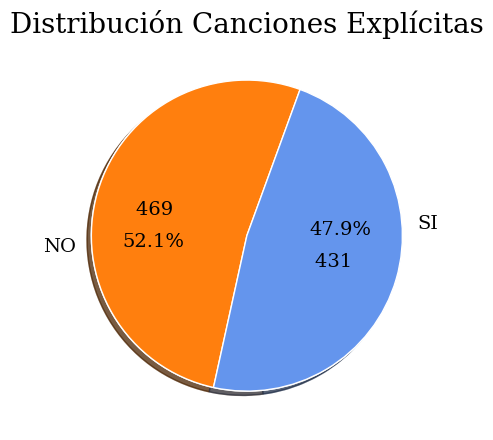

In [71]:
# Definir los colores y las etiquetas del gráfico
colors = ['#ff7f0e', 'cornflowerblue']
labels = ['NO', 'SI']

# Definir los parámetros del gráfico
plt.rcParams.update({'font.family': 'serif', 'font.size': 16, 'axes.edgecolor': 'black', 'axes.linewidth': 1.5, 'text.color': 'black'})

# Crear el gráfico de pastel
count = df['Explícito'].value_counts()
plt.pie(count, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14}, wedgeprops={'edgecolor': 'white'}, shadow=True)

# Agregar título y borde al gráfico
plt.title('Distribución Canciones Explícitas', fontsize=20)
plt.gca().set_aspect('equal')
plt.pie(count, colors=colors, autopct=lambda x: f"{int(x/100*sum(count))} ", shadow=True, startangle=70, textprops={'fontsize': 14}, wedgeprops={'edgecolor': 'white'})
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(False)

# Mostrar el gráfico
plt.show()

**La distribución de canciones entre explícitas y no explícitas es una característica importante de la industria musical y puede tener implicaciones en términos de audiencia y comercialización.**

En este caso, la mayoría de las canciones son no explícitas, representando el 52% del conjunto de datos, mientras que el 48% son explícitas.

En primer lugar, el hecho de que casi la mitad de las canciones en Spotify contengan contenido explícito sugiere que hay una demanda significativa por parte de los usuarios por este tipo de música. Esto podría reflejar una tendencia más amplia en la cultura popular, donde el contenido explícito se ha vuelto cada vez más común en la música y otros medios.

Por otro lado, el hecho de que el 52% de las canciones no tengan contenido explícito sugiere que todavía hay una demanda importante por parte de los usuarios de Spotify por música que no contenga lenguaje o temas explícitos. Esto puede ser especialmente importante para aquellos usuarios que prefieren escuchar música en entornos públicos o en presencia de niños u otros miembros de la familia.

<div style="display:fill;
            color:white;
            border-radius:8px;
            border-width: 1px;
            border-style:solid;
            border-color:#150D0A;
            background-color:#1AB26B;
            font-size:120%;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Outliers</b></p>
</div>

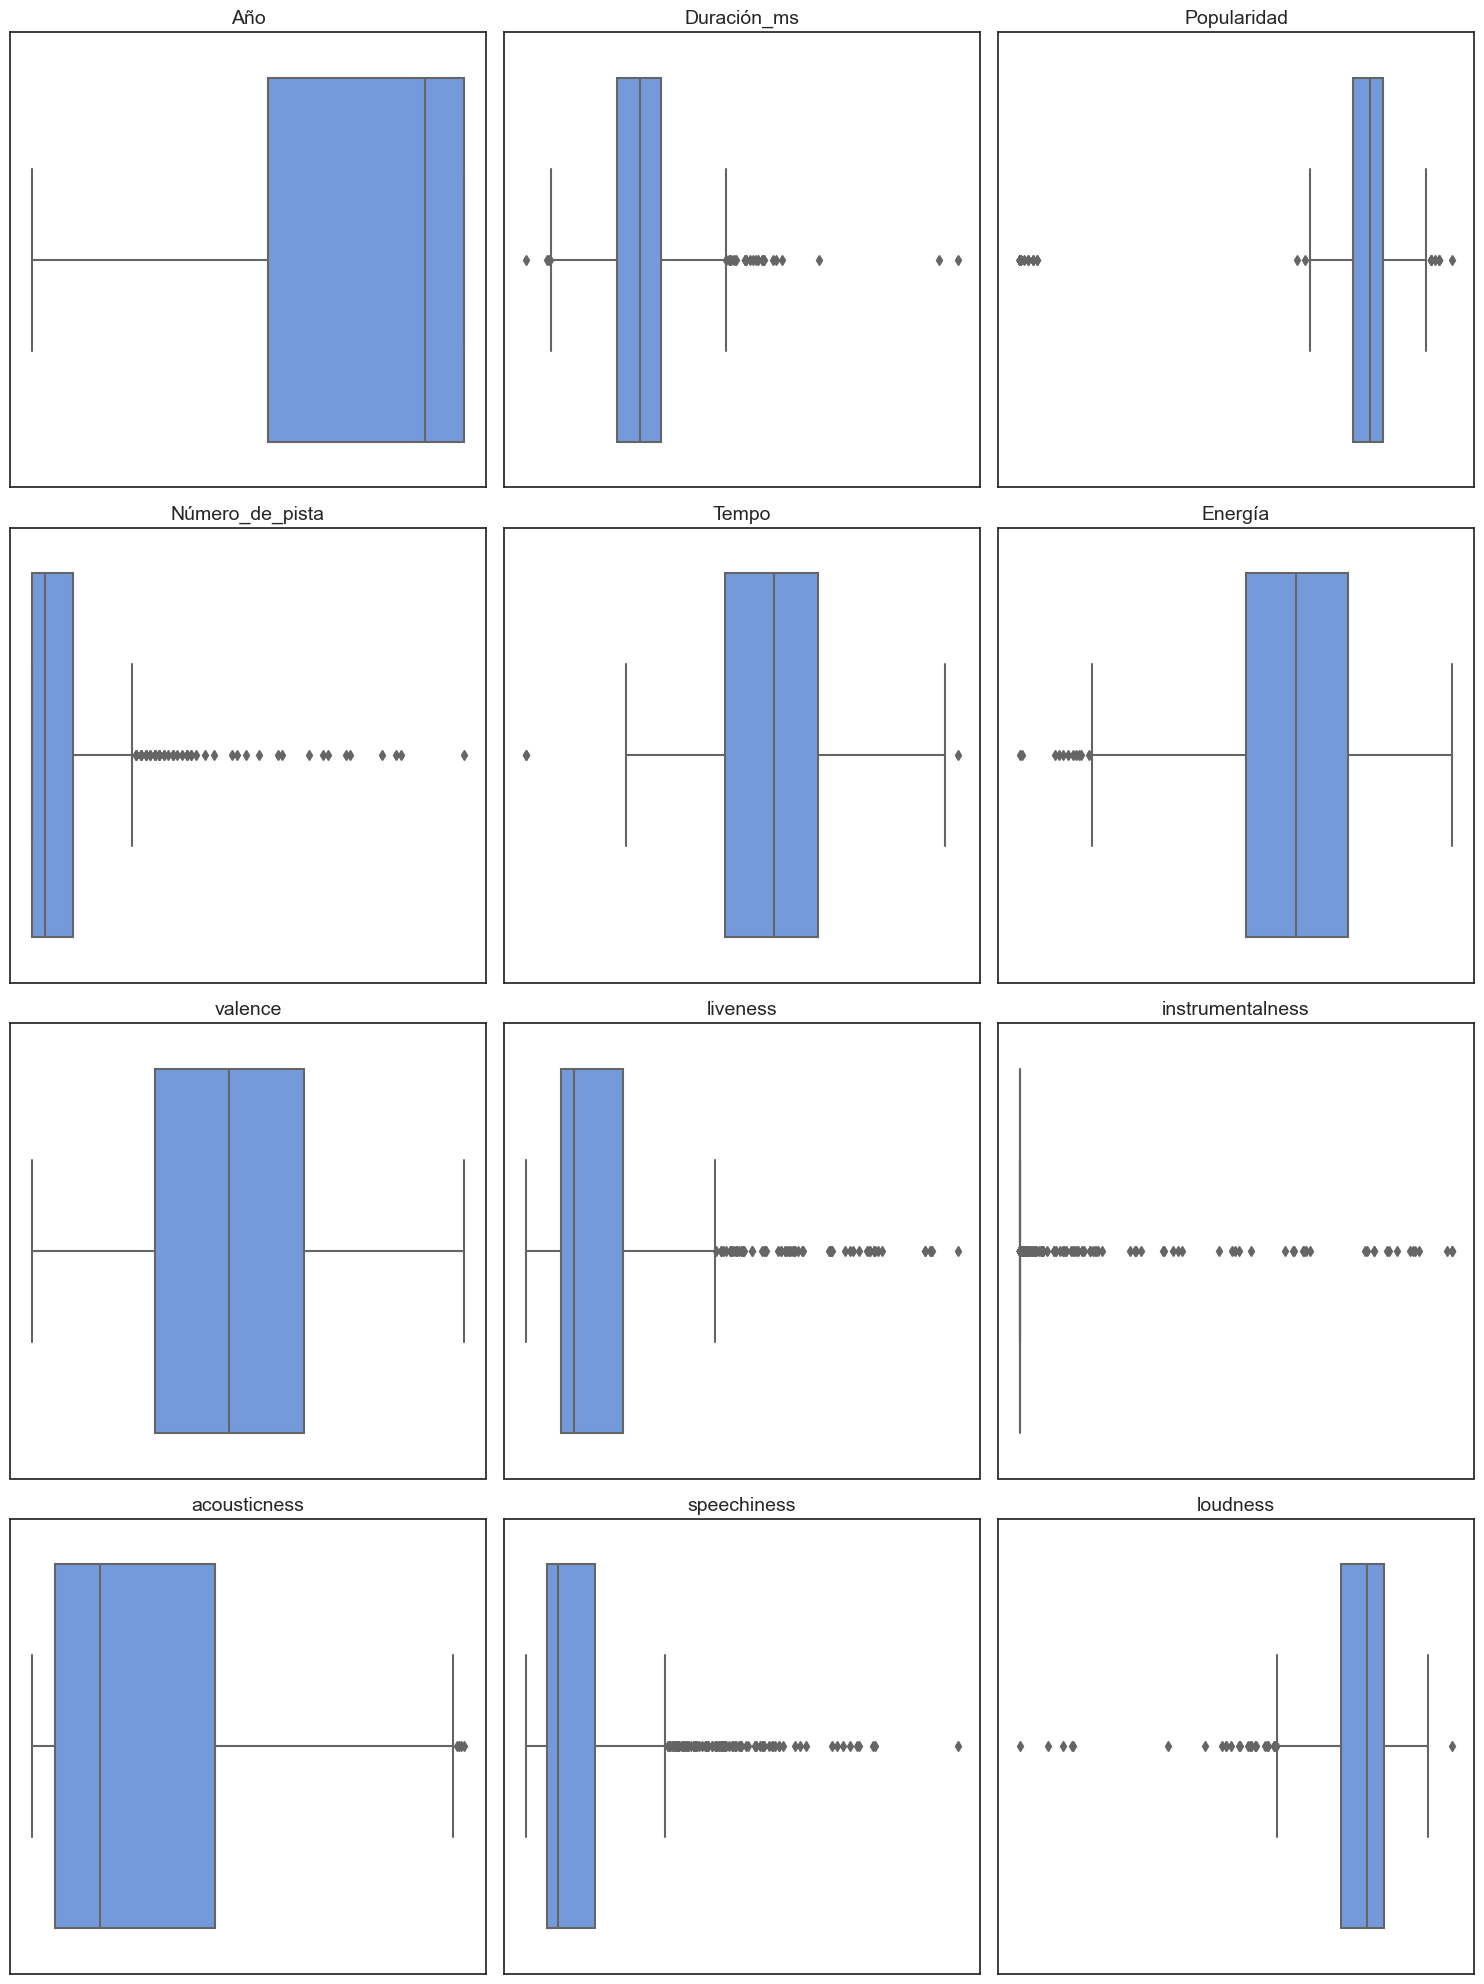

In [42]:
# Define columns to include
cols_to_include = [col for col in df.select_dtypes(include=np.number).columns if col not in ['Explícito', 'Modo']]

# Define number of columns and rows for subplots
n_cols = 3
n_rows = int(np.ceil(len(cols_to_include) / n_cols))

# Create subplots and plot data on each one
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows), sharey=True)

for ax, atr in zip(axes.flat, cols_to_include):
    sns.boxplot(x=df[atr], color='cornflowerblue', ax=ax)
    ax.set_title(atr, fontsize=14)
    ax.set(xlabel='', ylabel='', xticklabels=[], yticklabels=[])
    
# Adjust layout and display plot
plt.tight_layout()
plt.show()

**Los Outliers no parecen afectar en nuestra predicción, por lo tanto, no van a ser tratados**
1. **Año:** En el caso de este atributo, los outliers pueden indicar la presencia de canciones antiguas o muy nuevas que tienen una popularidad inesperada o que pueden ser importantes culturalmente.
2. **Duración_ms:** Los outliers pueden indicar la presencia de canciones que son significativamente más largas o cortas que la mayoría de las canciones en la base de datos. Estos outliers podrían estar relacionados con la popularidad de la canción, ya que las canciones más populares tienden a tener una duración similar.
3. **Popularidad:** Los outliers pueden indicar la presencia de canciones extremadamente populares o impopulares que pueden ser importantes culturalmente o simplemente una anomalía en la base de datos.
4. **Número de pista:** Este atributo no puede tener outliers.
5. **Tempo:** Los outliers pueden indicar la presencia de canciones con un tempo extremadamente rápido o lento, lo que podría estar relacionado con el género musical o la popularidad de la canción.
6. **Energía:** Los outliers pueden indicar la presencia de canciones con una energía extremadamente alta o baja, lo que podría estar relacionado con el género musical o la popularidad de la canción.
7. **Valence:** Los outliers pueden indicar la presencia de canciones extremadamente positivas o negativas, lo que podría estar relacionado con el género musical o la popularidad de la canción.
8. **Liveness:** Los outliers pueden indicar la presencia de canciones que se grabaron en vivo, lo que podría estar relacionado con la popularidad de la canción o la naturaleza del artista.
9. **Instrumentalness:** Los outliers pueden indicar la presencia de canciones que son extremadamente instrumentales o vocales, lo que podría estar relacionado con el género musical o la popularidad de la canción.
10. **Acousticness:** Los outliers pueden indicar la presencia de canciones que son extremadamente acústicas o no acústicas, lo que podría estar relacionado con el género musical o la popularidad de la canción.
11. **Speechiness:** Los outliers pueden indicar la presencia de canciones que contienen una cantidad inesperada de elementos hablados, lo que podría estar relacionado con el género musical o la popularidad de la canción.
12. **Loudness:** Los outliers pueden indicar la presencia de canciones extremadamente fuertes o suaves, lo que podría estar relacionado con el género musical o la popularidad de la canción.

<div style="display:fill;
            color:white;
            border-radius:8px;
            border-width: 1px;
            border-style:solid;
            border-color:#150D0A;
            background-color:#1AB26B;
            font-size:120%;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Histogramas</b></p>
</div>

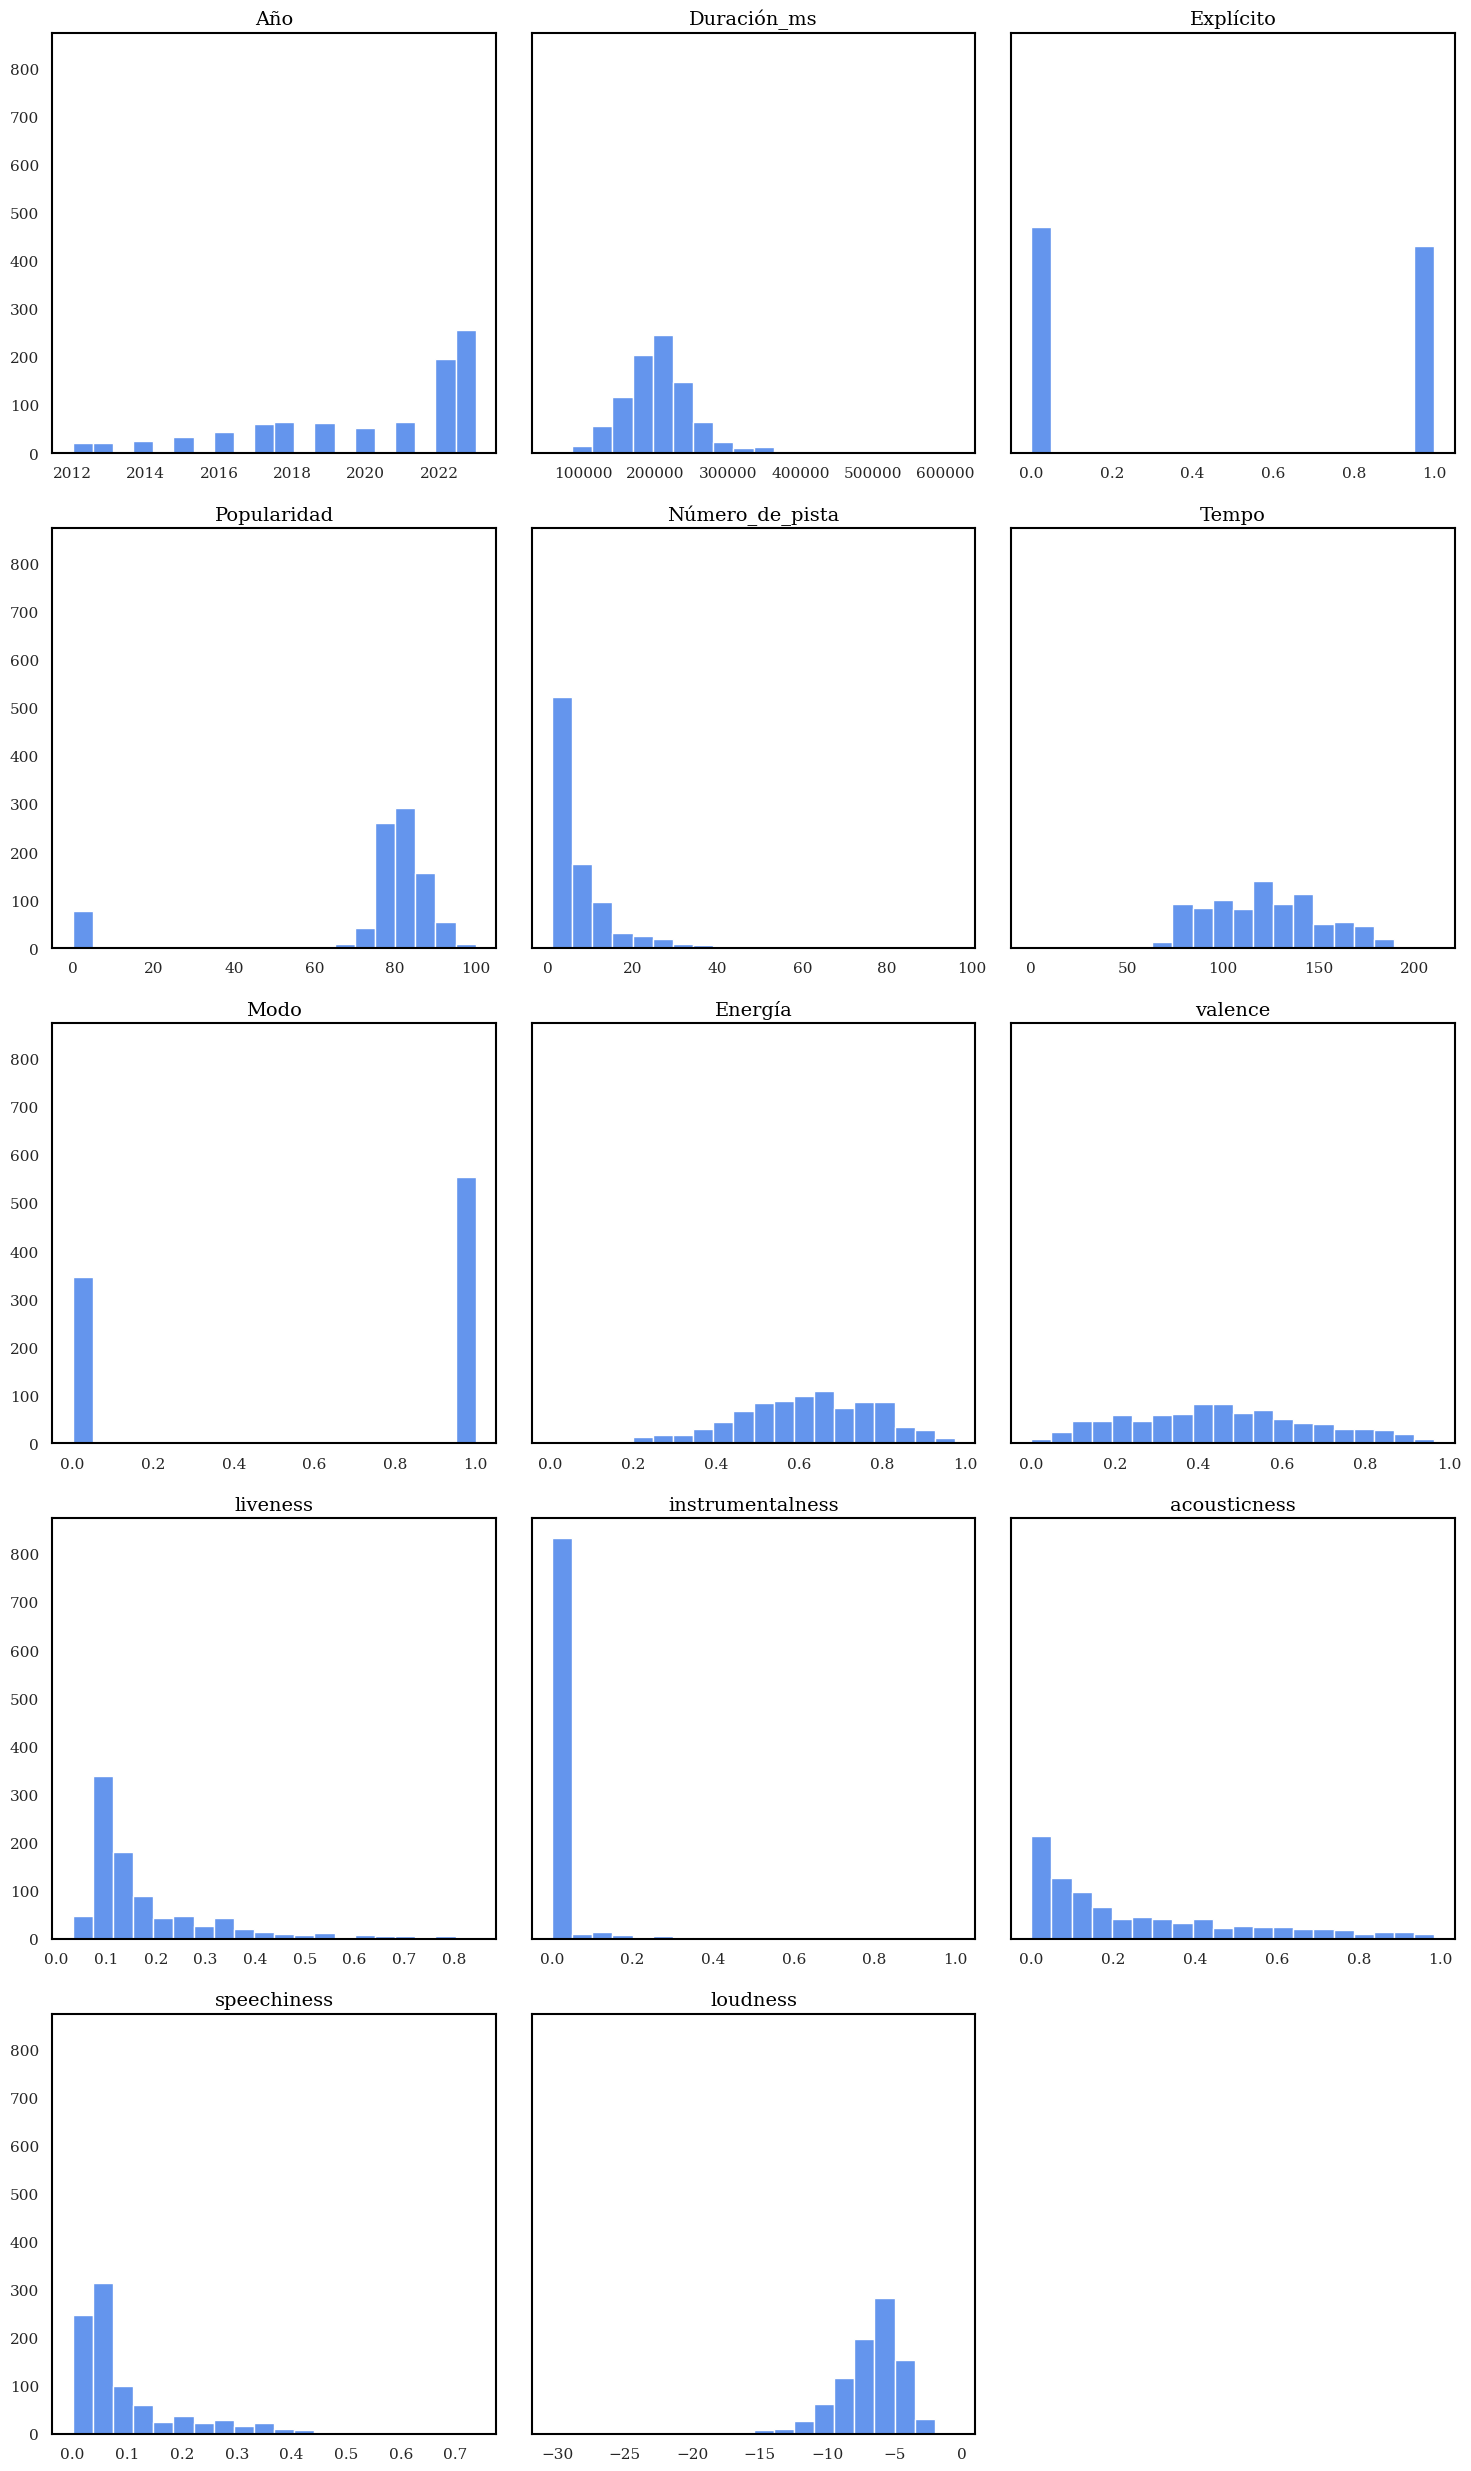

In [84]:
# Define columns to include
cols_to_include = df.select_dtypes(include=np.number).columns

# Define number of columns and rows for subplots
n_cols = 3
n_rows = int(np.ceil(len(cols_to_include) / n_cols))

# Create subplots and plot data on each one
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows), sharey=True)

for ax, atr in zip(axes.flat, cols_to_include):
    ax.hist(df[atr], color='cornflowerblue', bins=20)
    ax.set_title(atr, fontsize=14)
    ax.set(xlabel='', ylabel='')
    
# Remove last subplot
fig.delaxes(axes[-1, -1])

# Adjust layout and display plot
plt.tight_layout()
plt.show()

<div style="display:fill;
            color:white;
            border-radius:8px;
            border-width: 1px;
            border-style:solid;
            border-color:#150D0A;
            background-color:#1AB26B;
            font-size:120%;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Histogramas y diagramas de caja vs Explicito</b></p>
</div>

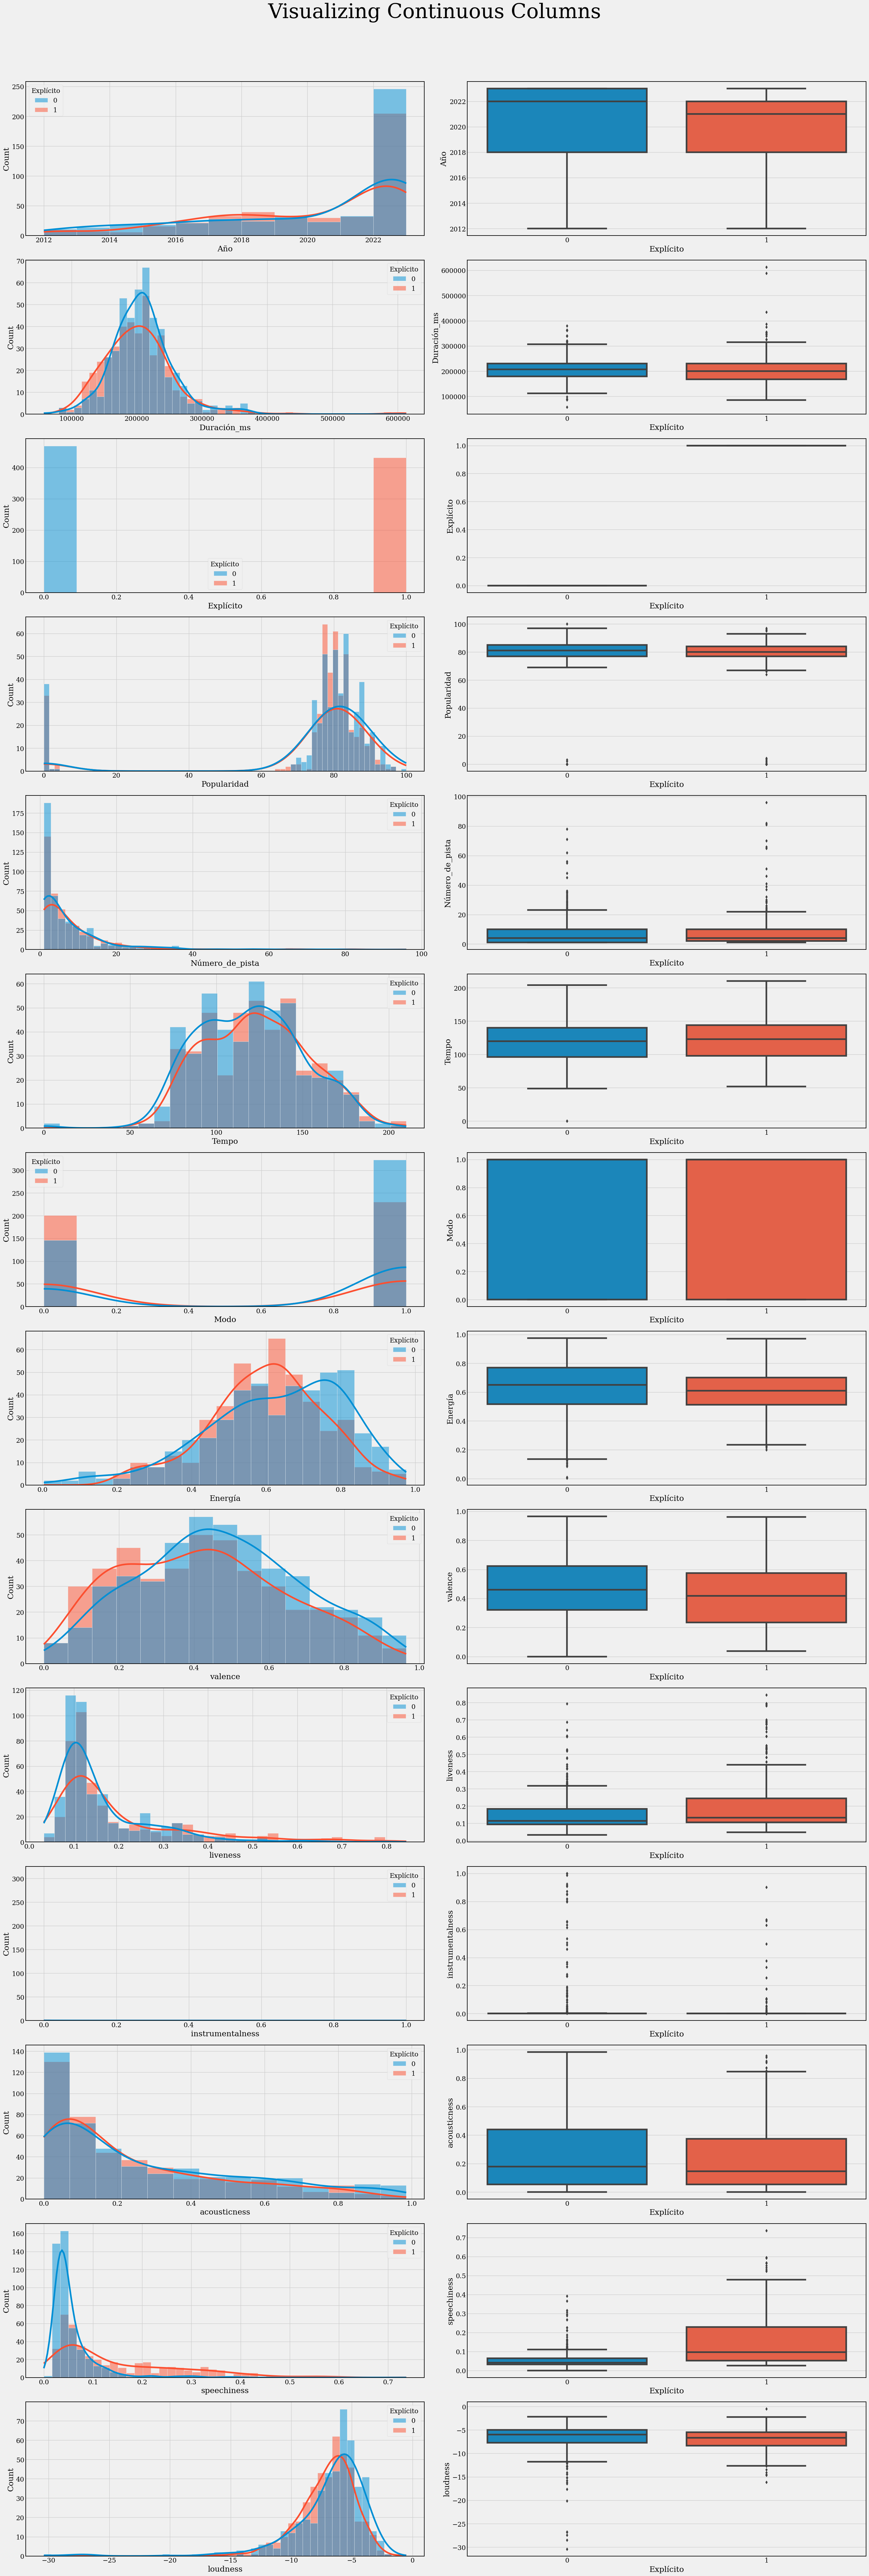

In [19]:
# Select continuous columns
con_cols = df.select_dtypes(include=['float', 'int']).columns

# Create subplots
fig, ax = plt.subplots(len(con_cols), 2, figsize=(30, 90))

# Create visualizations on each subplot
[(sns.histplot(data=df,x=col,ax=ax[i, 0],hue='Explícito',kde=True), sns.boxplot(x=df['Explícito'],y=df[col],ax=ax[i, 1])) for i, col in enumerate(con_cols)]

# Add a main title and adjust layout
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle("Visualizing Continuous Columns", fontsize=50)

# Show plot
plt.show()

**Podemos identificar tres tipos de histogramas los cuales son sesgados, comportamiento en forma normal y categoricos. Se dividen los atributos asi:**

- **Categoricos:** Modo, Explicito
- **Sesgados:** Año, Numero_de_pista, liveness, instrumentalness, acousticness
- **Comportamiento Normal:** duración_ms, popularidad, tempo, energia, valance, loudness

<div style="display:fill;
            color:white;
            border-radius:8px;
            border-width: 1px;
            border-style:solid;
            border-color:#150D0A;
            background-color:#1AB26B;
            font-size:120%;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Análisis Bivariado</b></p>
</div>

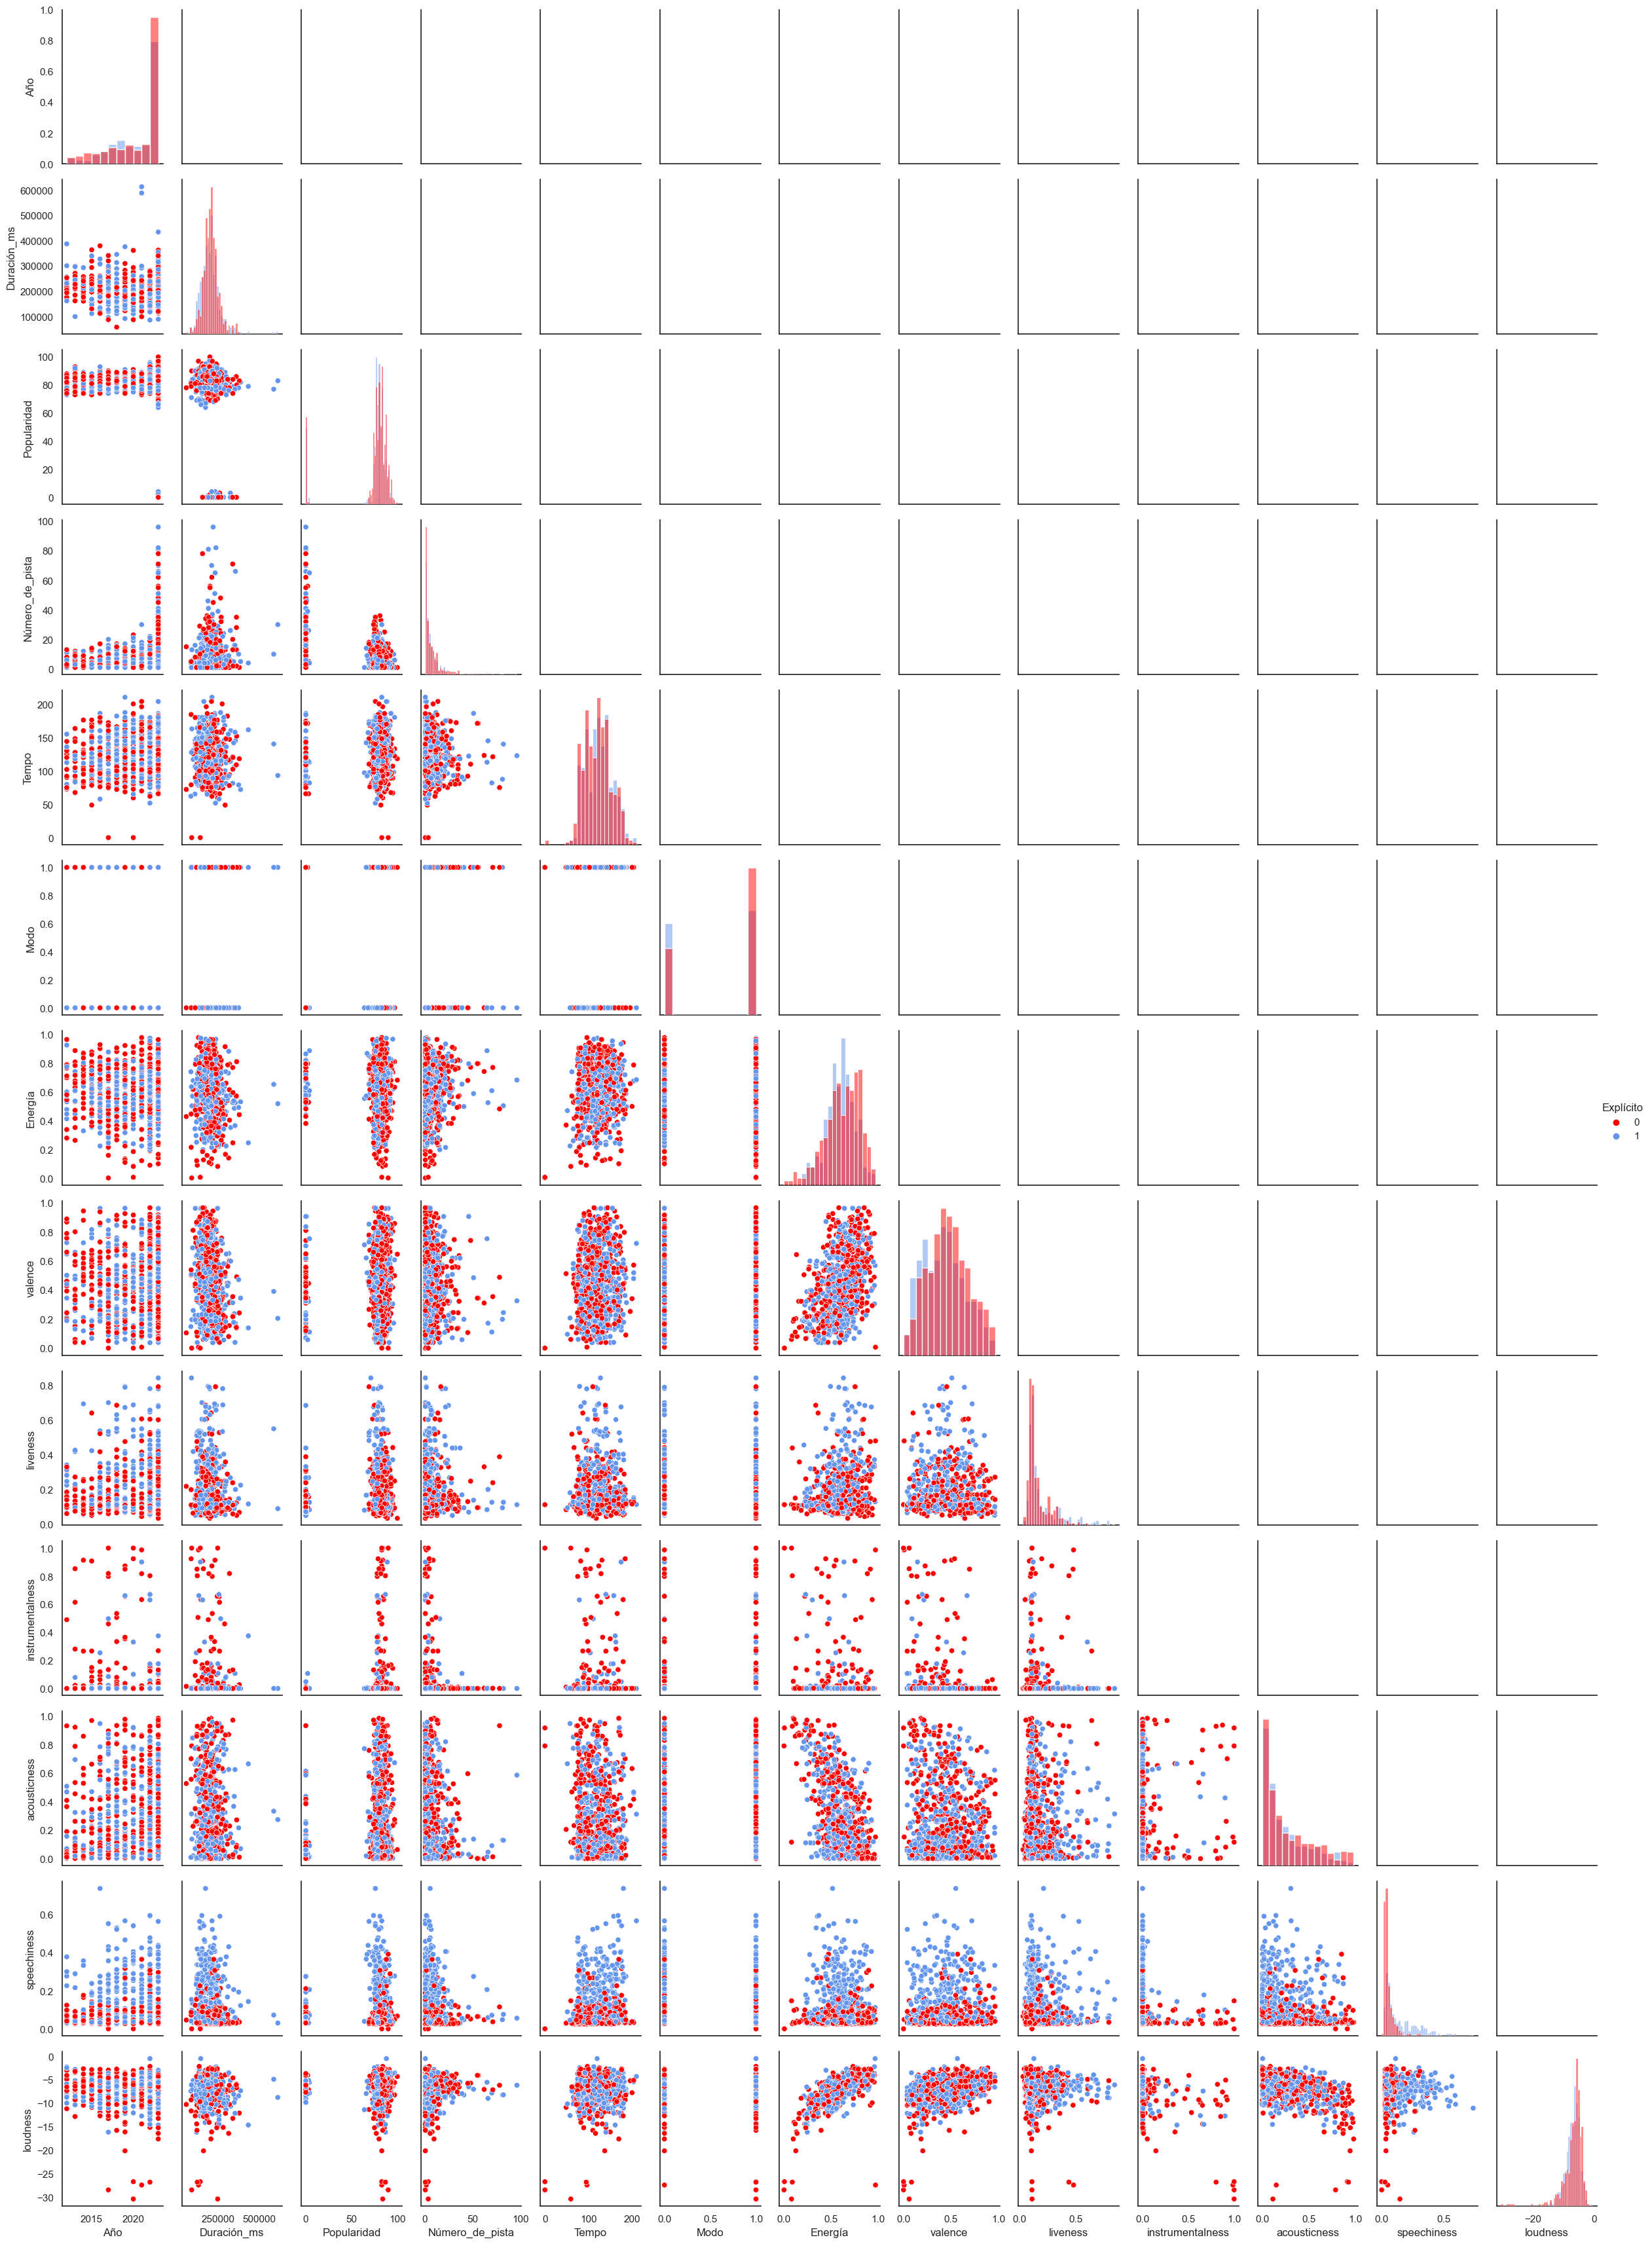

In [20]:
sns.set(style='white')
palette_custom = sns.color_palette(['red', 'cornflowerblue'])
maps = sns.PairGrid(data=df.iloc[:,:],hue='Explícito',diag_sharey=False, corner=False, palette=palette_custom)

maps.map_diag(sns.histplot)
maps.map_lower(sns.scatterplot)

maps.add_legend()
maps.fig.set_size_inches(25, 35)
plt.show()

**Se puede evidenciar que dos atributos no seran suficientes para la construcción de un modelo ya que no se logran separar los valores del target**

<div style="display:fill;
            color:white;
            border-radius:8px;
            border-width: 1px;
            border-style:solid;
            border-color:#150D0A;
            background-color:#1AB26B;
            font-size:120%;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Mapa de calor</b></p>
</div>

<AxesSubplot:>

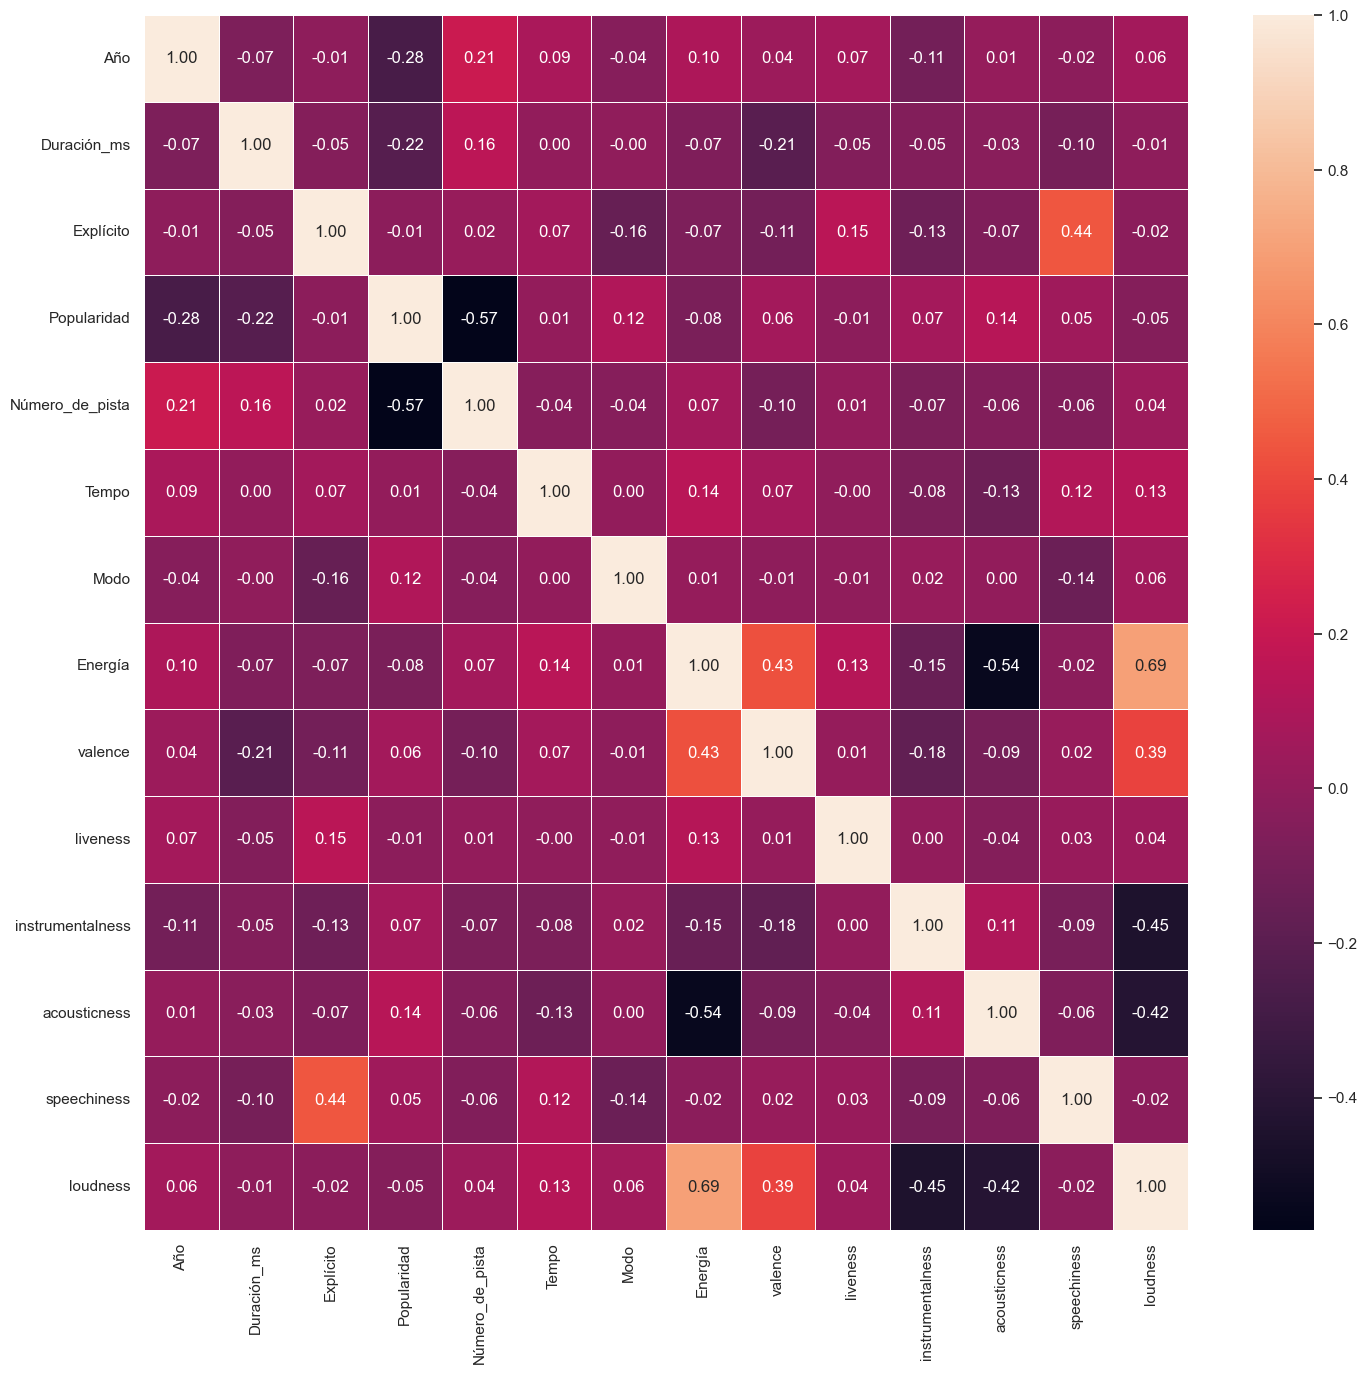

In [48]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='0.2f')

<div style="display:fill;
            color:white;
            border-radius:8px;
            border-width: 1px;
            border-style:solid;
            border-color:#150D0A;
            background-color:#1AB26B;
            font-size:120%;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Correlación de Pearson</b></p>
</div>

<AxesSubplot:title={'center':'Pearson Correlation with Explícito'}>

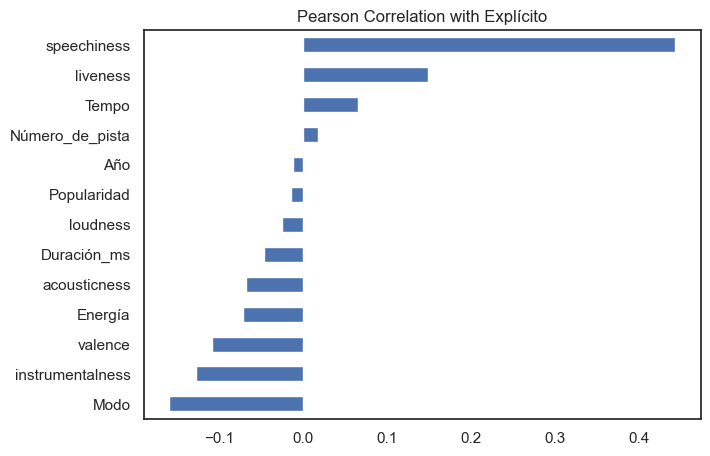

In [47]:
# Convert 'Explícito' column to float
df['Explícito'] = pd.to_numeric(df['Explícito'], errors='coerce')

# Calculate Pearson correlations for all numeric columns (except 'Explícito')
correlations = df.corr(method='pearson')['Explícito'].drop('Explícito')

# Sort the correlations in ascending order
correlations = correlations.sort_values()

# Create a bar chart of the correlations
correlations.plot(kind='barh', title='Pearson Correlation with Explícito')

**Se ha realizado un análisis de correlación de Pearson entre la variable "explicito" y las demas variables. Esta correlación se utiliza para medir la relación lineal entre dos variables cuantitativas. Es decir, busca si hay una relación directa o inversa entre las dos variables y mide la fuerza y la dirección de dicha relación. A continuación, se presentan los resultados de la correlación:**

- **Modo:** El coeficiente de correlación de Pearson entre "explicito" y "Modo" es de -0.153. Esto indica una correlación débilmente negativa entre ambas variables. Es decir, a medida que aumenta el valor de "Modo", es menos probable que el valor de "explicito" también aumente.
- **Instrumentalness:** El coeficiente de correlación de Pearson entre "explicito" e "instrumentalness" es de -0.130. Esto indica una correlación débilmente negativa entre ambas variables. Es decir, a medida que aumenta el valor de "instrumentalness", es menos probable que el valor de "explicito" también aumente.
- **Valence:** El coeficiente de correlación de Pearson entre "explicito" y "valence" es de -0.108. Esto indica una correlación débilmente negativa entre ambas variables. Es decir, a medida que aumenta el valor de "valence", es menos probable que el valor de "explicito" también aumente.
- **Acousticness:** El coeficiente de correlación de Pearson entre "explicito" y "acousticness" es de -0.102. Esto indica una correlación débilmente negativa entre ambas variables. Es decir, a medida que aumenta el valor de "acousticness", es menos probable que el valor de "explicito" también aumente.
- **Energía:** El coeficiente de correlación de Pearson entre "explicito" y "Energía" es de -0.073. Esto indica una correlación débilmente negativa entre ambas variables. Es decir, a medida que aumenta el valor de "Energía", es menos probable que el valor de "explicito" también aumente.
- **Popularidad:** El coeficiente de correlación de Pearson entre "explicito" y "Popularidad" es de -0.055. Esto indica una correlación débilmente negativa entre ambas variables. Es decir, a medida que aumenta el valor de "Popularidad", es menos probable que el valor de "explicito" también aumente.
- **Loudness:** El coeficiente de correlación de Pearson entre "explicito" y "loudness" es de -0.041. Esto indica una correlación débilmente negativa entre ambas variables. Es decir, a medida que aumenta el valor de "loudness", es menos probable que el valor de "explicito" también aumente.
- **Duración_ms:** El coeficiente de correlación de Pearson entre "explicito" y "Duración_ms" es de -0.009. Esto indica una correlación débilmente negativa entre ambas variables. Es decir, a medida que aumenta el valor de "Duración_ms", es menos probable que el valor de "explicito" también aumente.
- **Año:** El coeficiente de correlación de Pearson entre "explicito" y "Año" es de 0.004. Esto indica una correlación débilmente positiva entre ambas variables. Es decir, a medida que aumenta el valor de "Año", es ligeramente más probable que el valor de "explicito" también aumente.
- **Tempo:** El coeficiente de correlación de Pearson entre "explicito" y "Tempo" es de 0.066. Esto indica una correlación débilmente positiva entre ambas variables. Es decir, a medida que aumenta el valor de "Tempo", es ligeramente más probable que el valor de "explicito" también aumente.
- **Número_de_pista:** El coeficiente de correlación de Pearson entre "explicito" y "Número_de_pista" es de 0.084. Esto indica una correlación débilmente positiva entre ambas variables. Es decir, a medida que aumenta el valor de "Número_de_pista", es ligeramente más probable que el valor de "explicito" también aumente.
- **Liveness:** El coeficiente de correlación de Pearson entre "explicito" y "liveness" es de 0.133. Esto indica una correlación débilmente positiva entre ambas variables. Es decir, a medida que aumenta el valor de "liveness", es más probable que el valor de "explicito" también aumente.
- **Speechiness:** El coeficiente de correlación de Pearson entre "explicito" y "speechiness" es de 0.428. Esto indica una correlación moderadamente positiva entre ambas variables. Es decir, a medida que aumenta el valor de "speechiness", es más probable que el valor de "explicito" también aumente.

# <b>3 <span style='color:#1AB26B'>|</span> Modelos</b>

<div style="display:fill;
            color:white;
            border-radius:8px;
            border-width: 1px;
            border-style:solid;
            border-color:#150D0A;
            background-color:#1AB26B;
            font-size:120%;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | KNN</b></p>
</div>

In [90]:
predictores = ['speechiness']
target = 'Explícito'

y = df[target].values
X = df[predictores].values

In [91]:
count_p = (df[target] == 1).sum()
print("Número de Observaciones para Explicito: ", count_p)

count_n = (df[target] == 0).sum()
print("Número de Observaciones para No Explicito: ", count_n)

print("Línea Base: %.2f" % (100*max(count_n,count_p)/(count_p+count_n)))

Número de Observaciones para Explicito:  431
Número de Observaciones para No Explicito:  469
Línea Base: 52.11


In [92]:
from sklearn.model_selection import train_test_split
# Crear conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(720, 1)
(180, 1)
(720,)
(180,)


In [93]:
pos_train = sum(y_train)
neg_train = len(y_train)-pos_train
print('Number of Positives %d' %pos_train)
print('Number of Negatives %d' %neg_train)
print('Percentage of Positives %.2f' % (100*(pos_train/neg_train)))

Number of Positives 336
Number of Negatives 384
Percentage of Positives 87.50


In [94]:
pos_test = sum(y_test)
neg_test = len(y_test)-pos_test
print('Number of Positives %d' %pos_test)
print('Number of Negatives %d' %neg_test)
print('Percentage of Positives %.2f' % (100*(pos_test/neg_test)))

Number of Positives 95
Number of Negatives 85
Percentage of Positives 111.76


In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
from sklearn.neighbors import KNeighborsClassifier

#Hiperparemeters
n_neighbors = 5

knn_1 = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_1.fit(X_train,y_train)

KNeighborsClassifier()

In [97]:
y_pred_train = knn_1.predict(X_train)
y_pred_test = knn_1.predict(X_test)

y_pred_train_proba = knn_1.predict_proba(X_train)
y_pred_test_proba = knn_1.predict_proba(X_test)

C:\Users\cuatr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\cuatr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [98]:
y_pred_train_proba

array([[0.6, 0.4],
       [0.6, 0.4],
       [1. , 0. ],
       ...,
       [0.4, 0.6],
       [0.6, 0.4],
       [0.6, 0.4]])

TPR: 0.7411
FPR: 0.1667
Accuracy: 0.7903
Precision: 0.7955
Recall: 0.7411
F1 score: 0.7955


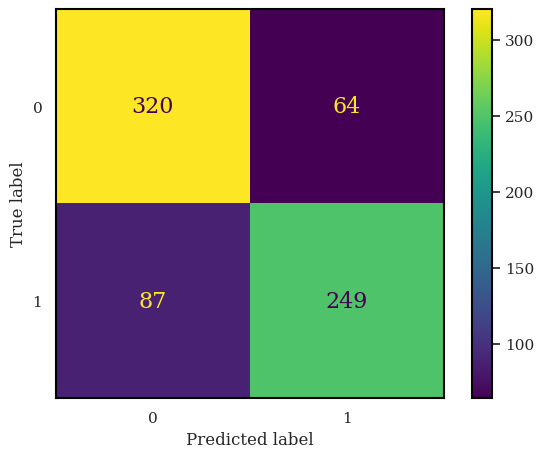

In [99]:
# Evaluación en el conjunto de entrenamiento
from sklearn import metrics

cm = metrics.confusion_matrix(y_train,y_pred_train)  #Una matriz de confusión para todas las categorías.
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
print('TPR: %.4f' % TPR)
print('FPR: %.4f' % FPR)
acc = (TP+TN)/(TP+TN+FP+FN)
prec = TP/(TP+FP)
f1 = 2*(prec*TPR)/(prec+TPR)
print('Accuracy: %.4f' % acc)
print('Precision: %.4f' % prec)
print('Recall: %.4f' % TPR)
print('F1 score: %.4f' % prec)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

TPR: 0.6737
FPR: 0.2235
Accuracy: 0.7222
Precision: 0.7711
Recall: 0.6737
F1 score: 0.7711


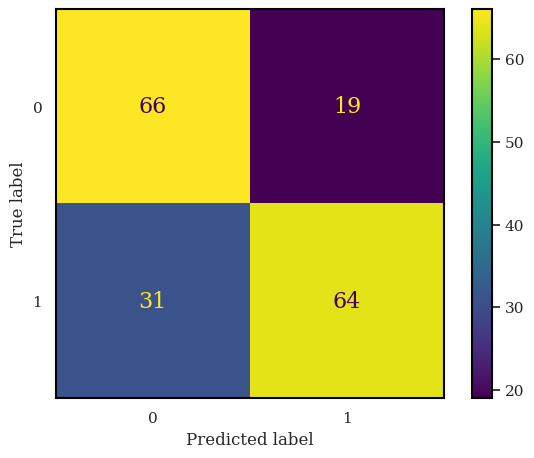

In [100]:
# Evaluación en el conjunto de prueba
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,y_pred_test)  #Una matriz de confusión para todas las categorías.
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
print('TPR: %.4f' % TPR)
print('FPR: %.4f' % FPR)
acc = (TP+TN)/(TP+TN+FP+FN)
prec = TP/(TP+FP)
f1 = 2*(prec*TPR)/(prec+TPR)
print('Accuracy: %.4f' % acc)
print('Precision: %.4f' % prec)
print('Recall: %.4f' % TPR)
print('F1 score: %.4f' % prec)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()